In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# Netflix EDA

## Loading the dataset

In [2]:
net_basic = pd.read_csv('./netflix_titles.csv')
net_basic.head(10)

show_id     type                             title  \
0      s1    Movie              Dick Johnson Is Dead   
1      s2  TV Show                     Blood & Water   
2      s3  TV Show                         Ganglands   
3      s4  TV Show             Jailbirds New Orleans   
4      s5  TV Show                      Kota Factory   
5      s6  TV Show                     Midnight Mass   
6      s7    Movie  My Little Pony: A New Generation   
7      s8    Movie                           Sankofa   
8      s9  TV Show     The Great British Baking Show   
9     s10    Movie                      The Starling   

                        director  \
0                Kirsten Johnson   
1                            NaN   
2                Julien Leclercq   
3                            NaN   
4                            NaN   
5                  Mike Flanagan   
6  Robert Cullen, José Luis Ucha   
7                   Haile Gerima   
8                Andy Devonshire   
9                 Theodore Melfi   

                                                cast  \
0                                                NaN   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
3                                                NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
5  Kate Siegel, Zach Gilford, Hamish Linklater, H...   
6  Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9  Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   

                                             country          date_added  \
0                                      United States  September 25, 2021   
1                                       South Africa  September 24, 2021   
2                                                NaN  September 24, 2021   
3                                                NaN  September 24, 2021   
4                                              India  September 24, 2021   
5                                                NaN  September 24, 2021   
6                                                NaN  September 24, 2021   
7  United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
8                                     United Kingdom  September 24, 2021   
9                                      United States  September 24, 2021   

   release_year rating   duration  \
0          2020  PG-13     90 min   
1          2021  TV-MA  2 Seasons   
2          2021  TV-MA   1 Season   
3          2021  TV-MA   1 Season   
4          2021  TV-MA  2 Seasons   
5          2021  TV-MA   1 Season   
6          2021     PG     91 min   
7          1993  TV-MA    125 min   
8          2021  TV-14  9 Seasons   
9          2021  PG-13    104 min   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   
5                 TV Dramas, TV Horror, TV Mysteries   
6                           Children & Family Movies   
7   Dramas, Independent Movies, International Movies   
8                       British TV Shows, Reality TV   
9                                   Comedies, Dramas   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...  
5  The arrival of a charismatic young priest brin...  
6  Equestria's divided. But a bright-eyed hero be...  
7  On a photo shoot in Ghana, an American model s...  
8  A talented 

rating의 정보가 알아보기 어려우므로 target_ages라는 column을 추가해준다.
- [참고: Netflix Data Visualization - Target Ages](https://www.kaggle.com/joshuaswords/netflix-data-visualization)

In [3]:
# target_ages 추가
def add_target_ages(df):
    rating_ages = {
        'TV-PG': 'Older Kids',
        'TV-MA': 'Adults',
        'TV-Y7-FV': 'Older Kids',
        'TV-Y7': 'Older Kids',
        'TV-14': 'Teens',
        'R': 'Adults',
        'TV-Y': 'Kids',
        'NR': 'Adults',
        'PG-13': 'Teens',
        'TV-G': 'Kids',
        'PG': 'Older Kids',
        'G': 'Kids',
        'UR': 'Adults',
        'NC-17': 'Adults'
    }
    df['target_ages'] = df['rating'].replace(rating_ages)
    
    return df['target_ages']

add_target_ages(net_basic)

0            Teens
1           Adults
2           Adults
3           Adults
4           Adults
           ...    
8802        Adults
8803    Older Kids
8804        Adults
8805    Older Kids
8806         Teens
Name: target_ages, Length: 8807, dtype: object

In [4]:
net_basic.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
target_ages     8803
dtype: int64

In [5]:
net_basic.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
target_ages        4
dtype: int64

## Analysis based on Type

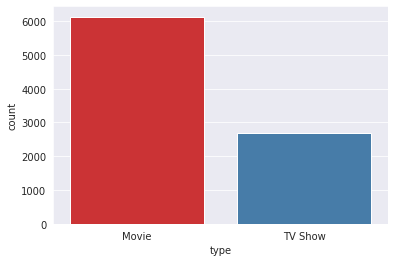

In [6]:
sns.set_style('darkgrid')
ax = sns.countplot(x="type", data=net_basic, palette="Set1")

In [7]:
net_tv = net_basic[net_basic['type']=='TV Show']

In [8]:
net_movie = net_basic[net_basic['type']=='Movie']

## Analysis based on Genre

In [9]:
#어떤 장르가 있는지 파악한 후 장르 수를 세기 위한 함수 선언
# genre_dict: 수가 많은 순서대로 반환
# genre_top10: 가장 많은 장르 10 개 반환
def get_info(data):
    data = list(map(lambda x: x.split(', '), list(data)))
    # 위의 결과가 이중리스트로 나오기 때문에 일차원 리스트로 바꿔줌
    data = list(itertools.chain(*data))
    data_count = Counter(data)
    
    data_sort = sorted(data_count.items(), key=lambda x: x[1], reverse=True)
    data_dict = {k: v for k, v in data_sort}
    data_top10 = {k: v for k, v in data_sort[:10]}
    return data, data_dict, data_top10

# 시각화
def show_genre(genre_dict, title, x_len=10, y_len=10):
    plt.figure(figsize=(x_len, y_len))
    x = list(genre_dict.keys())
    y = list(genre_dict.values())
    plt.vlines(x, ymin=0, ymax=y, color="gray")
    plt.plot(x, y, "o", color="green")
    plt.xticks(x, rotation = 45)
    plt.ylabel("The Number of Contents", fontsize=15)
    plt.title(title, fontsize = 18)

### Movie

In [10]:
net_mg, net_mg_dict, net_mg_top10 = get_info(net_movie['listed_in'])

가장 많은 수의 장르:International Movies
가장 적은 수의 장르: Movies


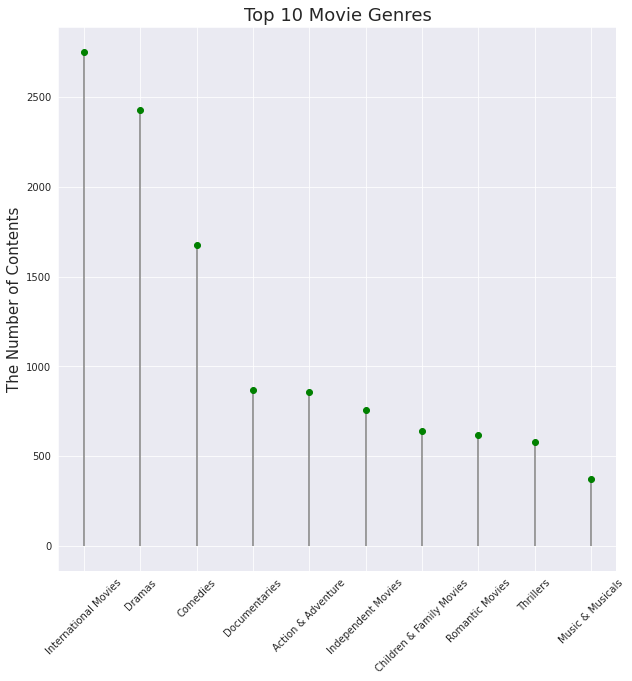

In [11]:
show_genre(net_mg_top10, "Top 10 Movie Genres")
print(f"가장 많은 수의 장르:{list(net_mg_dict.keys())[0]}\n가장 적은 수의 장르: {list(net_mg_dict.keys())[-1]}")

### TV Show

In [12]:
net_tg, net_tg_dict, net_tg_top10 = get_info(net_tv['listed_in'])

가장 많은 수의 장르:International TV Shows
가장 적은 수의 장르: TV Shows


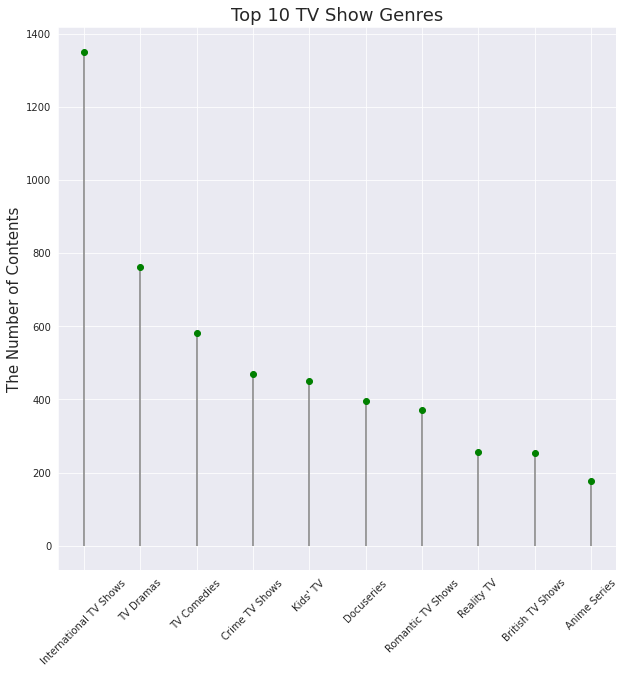

In [13]:
show_genre(net_tg_top10, "Top 10 TV Show Genres")
print(f"가장 많은 수의 장르:{list(net_tg_dict.keys())[0]}\n가장 적은 수의 장르: {list(net_tg_dict.keys())[-1]}")

## Analysis based on Rating

In [14]:
def show_column(data, data_col, col_name, n=10, k=0):
    plt.figure(figsize=(12, 10))
    sns.set(style='darkgrid')
    col_order = data_col.value_counts().index[0:n]
    ax = sns.countplot(x=col_name, data=data, palette="Set1", order=col_order)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = k)

### Movie

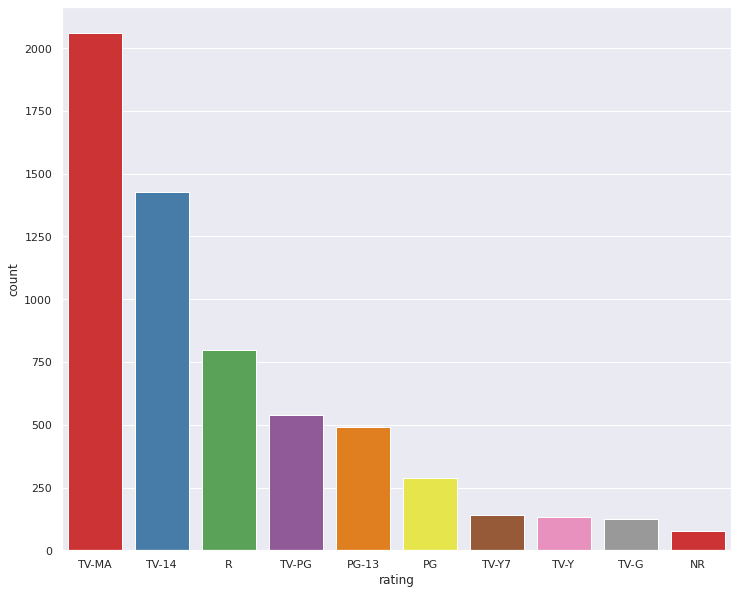

In [15]:
show_column(net_movie, net_movie['rating'], 'rating')

### TV show

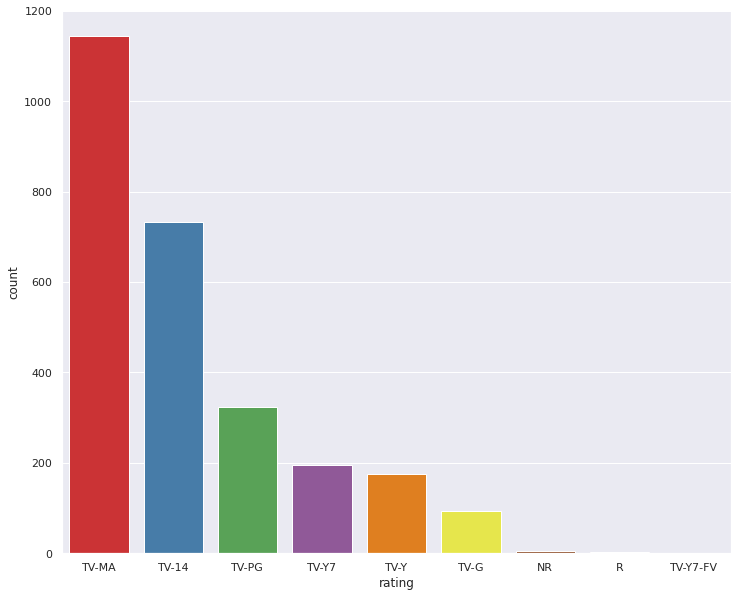

In [16]:
show_column(net_tv, net_tv['rating'], 'rating')

## Analysis based on Duration

In [17]:
def show_duration(duration):
    # 영화
    duration = duration.dropna()
    duration = duration.str.replace(' min', '')
    # TV show
    duration = duration.str.replace(' Seasons', '')
    duration = duration.str.replace(' Season', '')
    duration = duration.astype(str).astype(int)
    print(f"가장 짧은 경우: {min(duration)}\n가장 긴 경우: {max(duration)}")
    #시각화
    sns.set(style='darkgrid')
    sns.kdeplot(data=duration, shade=True)

가장 짧은 경우: 3
가장 긴 경우: 312


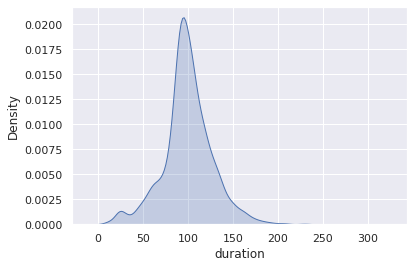

In [18]:
show_duration(net_movie['duration'])

가장 짧은 경우: 1
가장 긴 경우: 17


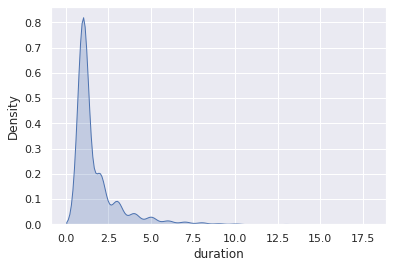

In [19]:
show_duration(net_tv['duration'])

## Analysis based on Year

### Movie

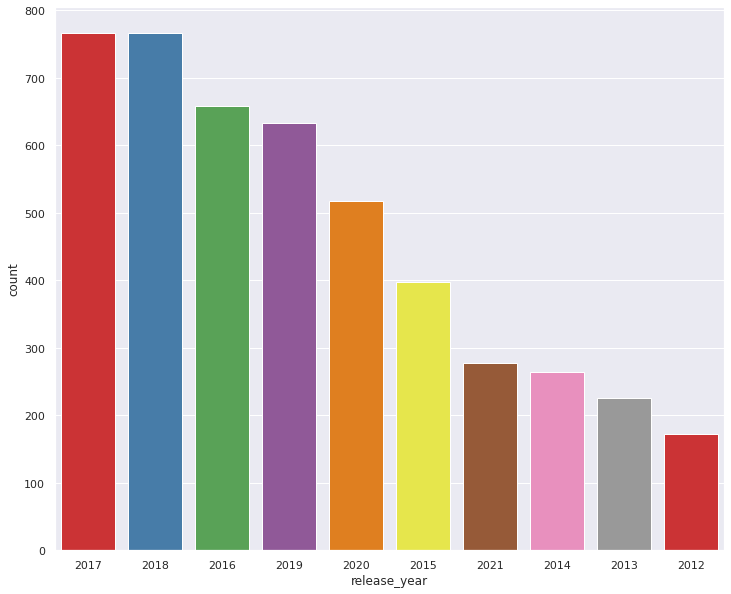

In [20]:
show_column(net_movie, net_movie['release_year'], 'release_year')

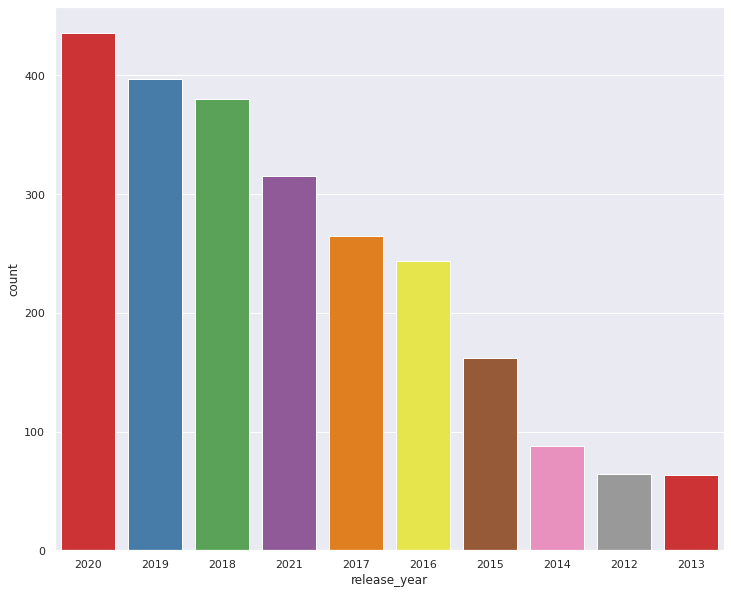

In [21]:
show_column(net_tv, net_tv['release_year'], 'release_year')

## Analysis based on Country

### Movie

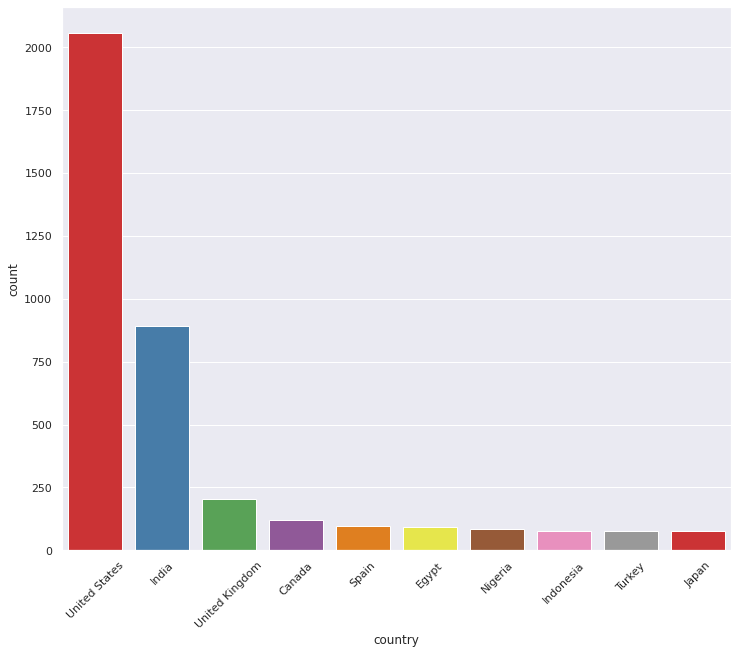

In [22]:
show_column(net_movie, net_movie['country'], 'country', 10, 45)

### TV show

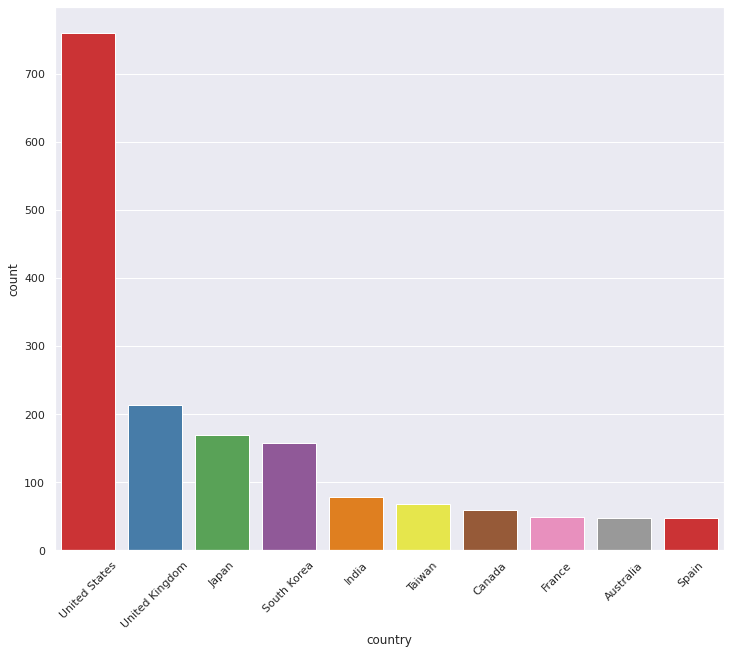

In [23]:
show_column(net_tv, net_tv['country'], 'country', 10, 45)

## Relation between Age and Genre

- [참고: Netflix Data Visualization - Target Ages](https://www.kaggle.com/joshuaswords/netflix-data-visualization)

위에선 한 컨텐츠에 여러 장르가 쓰여있을 경우 모두 고려했지만 여기서는 가장 먼저 쓰인 장르만을 고려했다.

In [24]:
def age_genre_heatmap(df, age_order=['Kids', 'Older Kids', 'Teens', 'Adults']):
    # listed_in에 여러 요소가 있는 경우 첫 번째 요소만 남김
    df['genre'] = df['listed_in'].apply(lambda x: x.split(',')[0])
    # ??
    df['count'] = 1
    dkd=df.groupby('genre')[['genre', 'count']].sum()
    # genre, count를 선택
    # sum을 해서 각 genre의 수를 셈 (count가 더해지는 것)
    # 인덱스는 genre, 더해진 결과는 count에 저장됨.
    # 저장된 상태에서 count를 기준으로 정렬
    data = df.groupby('genre')[['genre', 'count']].sum().sort_values(by='count', ascending=False).reset_index()[:10]
    data = data['genre']
    # df에서 genre의 값이 data와 일치하는 것만 골라냄
    df_heatmap = df.loc[df['genre'].isin(data)]
    # crosstab을 사용해 빈도표 생성
    df_heatmap = pd.crosstab(df_heatmap['genre'], df_heatmap['target_ages'], normalize="index").T
    
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    genre_order = data.to_list()
    
    # heatmap 생성 - cbar: colorbar 유무, annot: 각 셀에 숫자 입력 여부, fmt: 자료형태 지정, vmax: 최대, vmin: 최소
    sns.heatmap(df_heatmap.loc[age_order, genre_order], square=True, linewidth=2.5, cbar=False, annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

### Movie

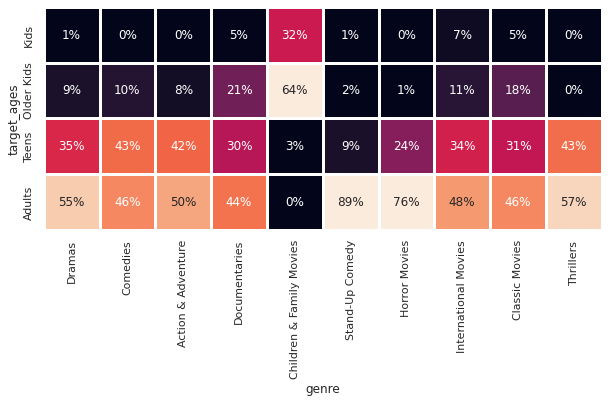

In [25]:
age_genre_heatmap(net_movie)

### TV Show

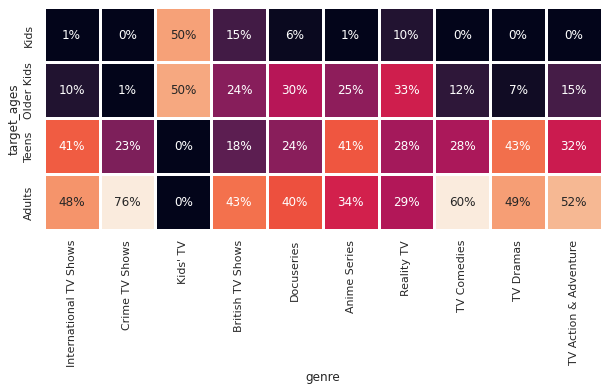

In [26]:
age_genre_heatmap(net_tv)

# Disney+ EDA

## Loading the dataset

In [27]:
dsny_basic = pd.read_csv('./disney_plus_titles.csv')
dsny_basic.head(10)

show_id     type                                             title  \
0      s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1      s2    Movie                            Ernest Saves Christmas   
2      s3    Movie                      Ice Age: A Mammoth Christmas   
3      s4    Movie                        The Queen Family Singalong   
4      s5  TV Show                             The Beatles: Get Back   
5      s6    Movie                                 Becoming Cousteau   
6      s7  TV Show                                           Hawkeye   
7      s8  TV Show                            Port Protection Alaska   
8      s9  TV Show                         Secrets of the Zoo: Tampa   
9     s10    Movie             A Muppets Christmas: Letters To Santa   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                                NaN   
5                         Liz Garbus   
6                                NaN   
7                                NaN   
8                                NaN   
9                   Kirk R. Thatcher   

                                                cast        country  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...            NaN   
1           Jim Varney, Noelle Parker, Douglas Seale            NaN   
2  Raymond Albert Romano, John Leguizamo, Denis L...  United States   
3  Darren Criss, Adam Lambert, Derek Hough, Alexa...            NaN   
4  John Lennon, Paul McCartney, George Harrison, ...            NaN   
5              Jacques Yves Cousteau, Vincent Cassel  United States   
6  Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...            NaN   
7  Gary Muehlberger, Mary Miller, Curly Leach, Sa...  United States   
8  Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...  United States   
9  Steve Whitmire, Dave Goelz, Bill Barretta, Eri...  United States   

          date_added  release_year rating   duration  \
0  November 26, 2021          2016   TV-G     23 min   
1  November 26, 2021          1988     PG     91 min   
2  November 26, 2021          2011   TV-G     23 min   
3  November 26, 2021          2021  TV-PG     41 min   
4  November 25, 2021          2021    NaN   1 Season   
5  November 24, 2021          2021  PG-13     94 min   
6  November 24, 2021          2021  TV-14   1 Season   
7  November 24, 2021          2015  TV-14  2 Seasons   
8  November 24, 2021          2019  TV-PG  2 Seasons   
9  November 19, 2021          2008      G     45 min   

                              listed_in  \
0                     Animation, Family   
1                                Comedy   
2             Animation, Comedy, Family   
3                               Musical   
4         Docuseries, Historical, Music   
5             Biographical, Documentary   
6           Action-Adventure, Superhero   
7         Docuseries, Reality, Survival   
8  Animals & Nature, Docuseries, Family   
9               Comedy, Family, Musical   

                                         description  
0   Join Mickey and the gang as they duck the halls!  
1  Santa Claus passes his magic bag to a new St. ...  
2          Sid the Sloth is on Santa's naughty list.  
3               This is real life, not just fantasy!  
4  A three-part documentary from Peter Jackson ca...  
5  An inside look at the legendary life of advent...  
6  Clint Barton/Hawkeye must team up with skilled...  
7  Residents of Port Protection must combat volat...  
8  A day in the life at ZooTampa is anything but ...  
9  Celebrate the holiday season with all your fav...

In [28]:
# ratings 변경
add_target_ages(dsny_basic)

0             Kids
1       Older Kids
2             Kids
3       Older Kids
4              NaN
           ...    
1445         Teens
1446    Older Kids
1447         Teens
1448         Teens
1449          Kids
Name: target_ages, Length: 1450, dtype: object

In [29]:
dsny_basic.count()

show_id         1450
type            1450
title           1450
director         977
cast            1260
country         1231
date_added      1447
release_year    1450
rating          1447
duration        1450
listed_in       1450
description     1450
target_ages     1447
dtype: int64

In [30]:
dsny_basic.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
target_ages       3
dtype: int64

## Analysis based on Type

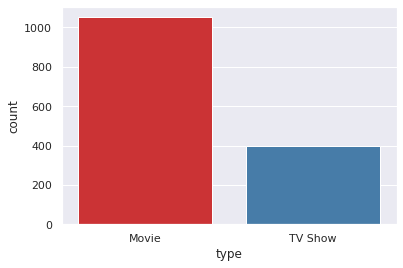

In [31]:
sns.set_style('darkgrid')
ax = sns.countplot(x="type", data=dsny_basic, palette="Set1")

In [32]:
dsny_tv = dsny_basic[dsny_basic['type']=='TV Show']

In [33]:
dsny_movie = dsny_basic[dsny_basic['type']=='Movie']

## Analysis based on Genre

### Movie

In [34]:
dsny_mg, dsny_mg_dict, dsny_mg_top10 = get_info(dsny_movie['listed_in'])

가장 많은 수의 장르:Family
가장 적은 수의 장르: Disaster


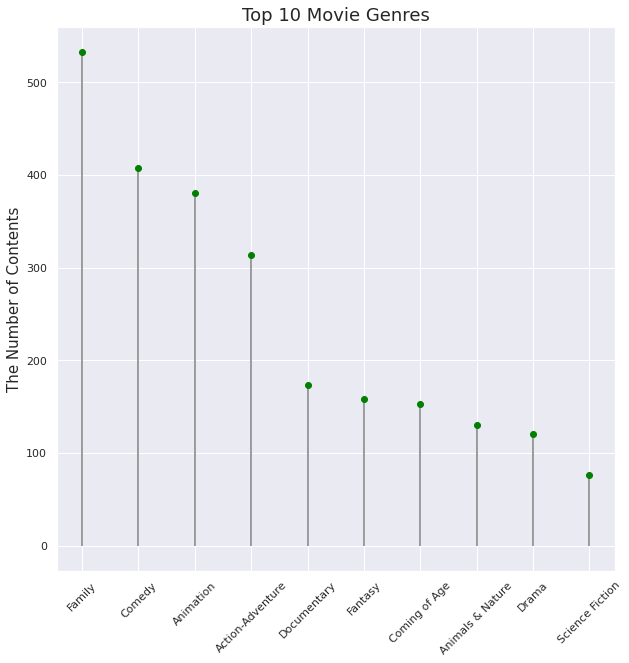

In [35]:
show_genre(dsny_mg_top10, "Top 10 Movie Genres")
print(f"가장 많은 수의 장르:{list(dsny_mg_dict.keys())[0]}\n가장 적은 수의 장르: {list(dsny_mg_dict.keys())[-1]}")

### TV Show

In [36]:
dsny_tg, dsny_tg_dict, dsny_tg_top10 = get_info(net_tv['listed_in'])

가장 많은 수의 장르:International TV Shows
가장 적은 수의 장르: TV Shows


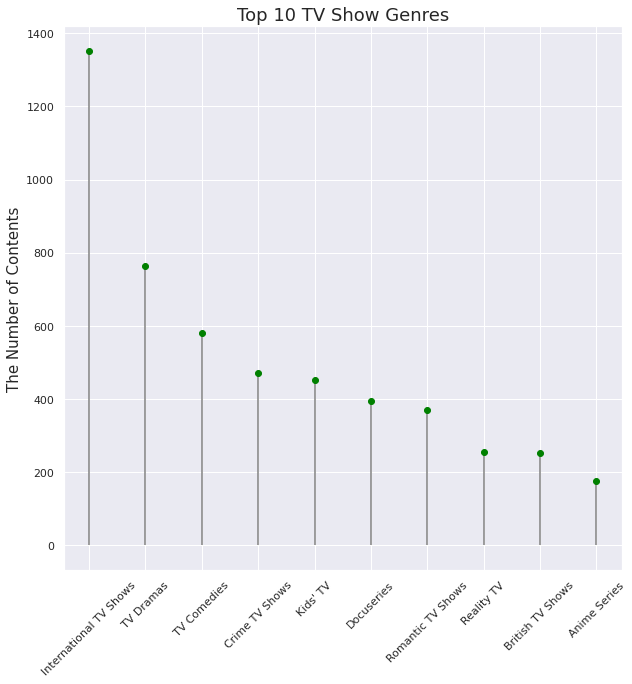

In [37]:
show_genre(dsny_tg_top10, "Top 10 TV Show Genres")
print(f"가장 많은 수의 장르:{list(dsny_tg_dict.keys())[0]}\n가장 적은 수의 장르: {list(dsny_tg_dict.keys())[-1]}")

## Analysis based on Rating

### Movie

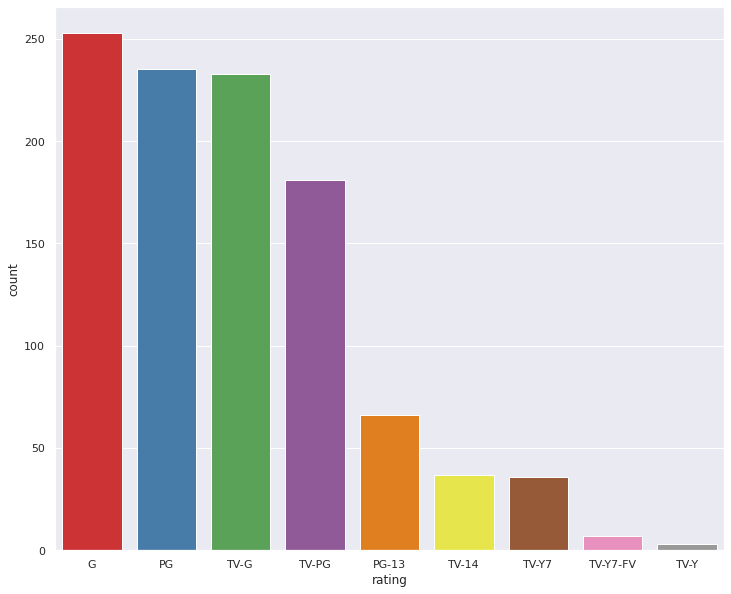

In [38]:
show_column(dsny_movie, dsny_movie['rating'], 'rating')

### TV show

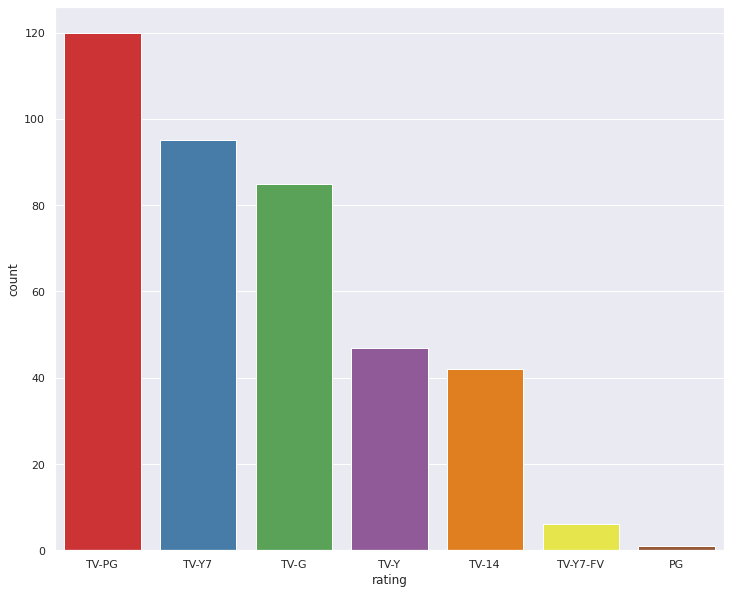

In [39]:
show_column(dsny_tv, dsny_tv['rating'], 'rating')

## Analysis based on Duration

가장 짧은 경우: 1
가장 긴 경우: 183


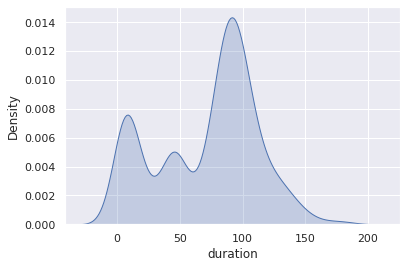

In [40]:
show_duration(dsny_movie['duration'])

가장 짧은 경우: 1
가장 긴 경우: 32


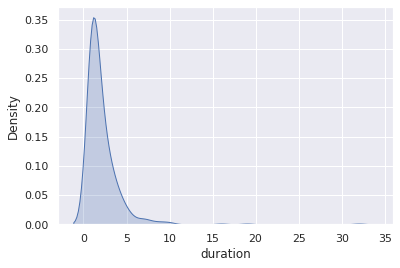

In [41]:
show_duration(dsny_tv['duration'])

## Analysis based on Year

### Movie

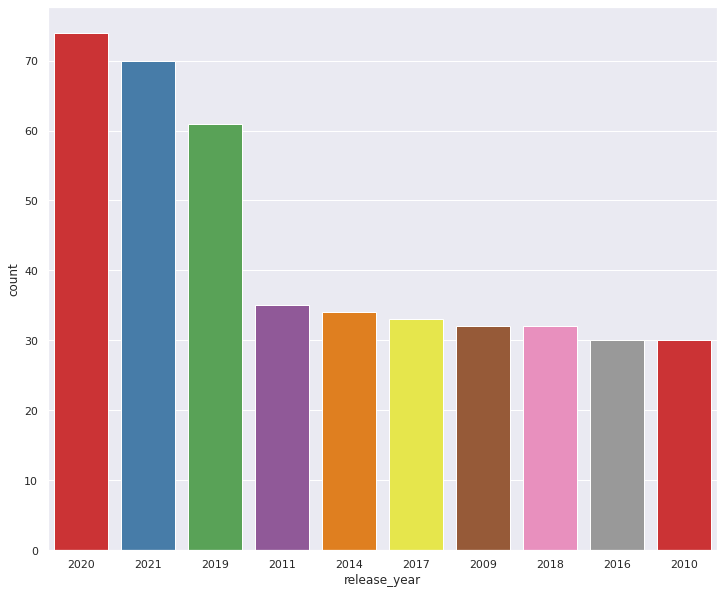

In [42]:
show_column(dsny_movie, dsny_movie['release_year'], 'release_year')

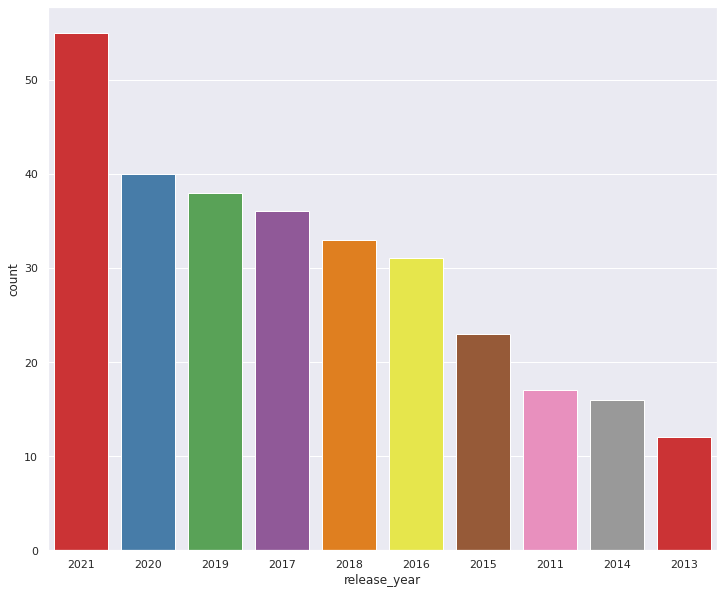

In [43]:
show_column(dsny_tv, dsny_tv['release_year'], 'release_year')

## Analysis based on Country

### Movie

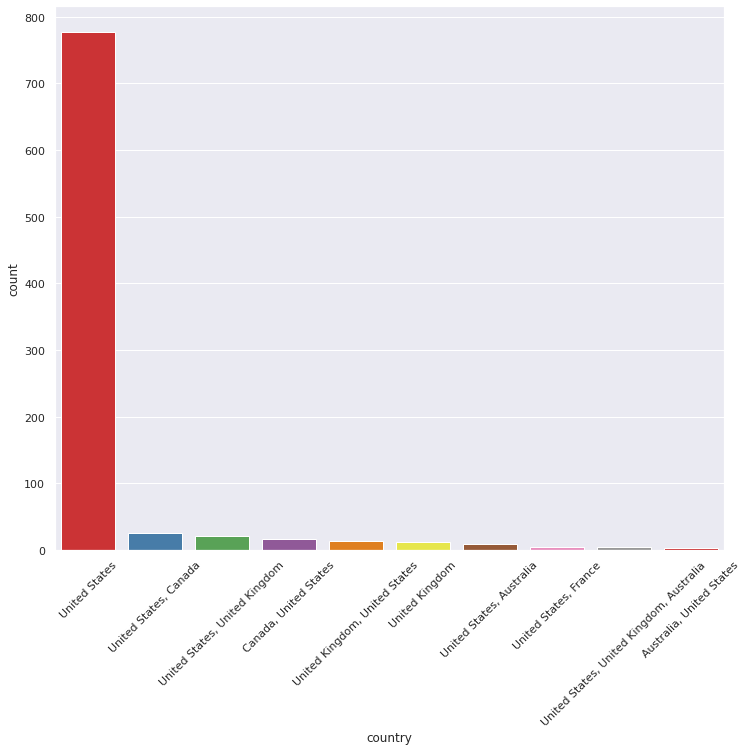

In [44]:
show_column(dsny_movie, dsny_movie['country'], 'country', 10, 45)

### TV show

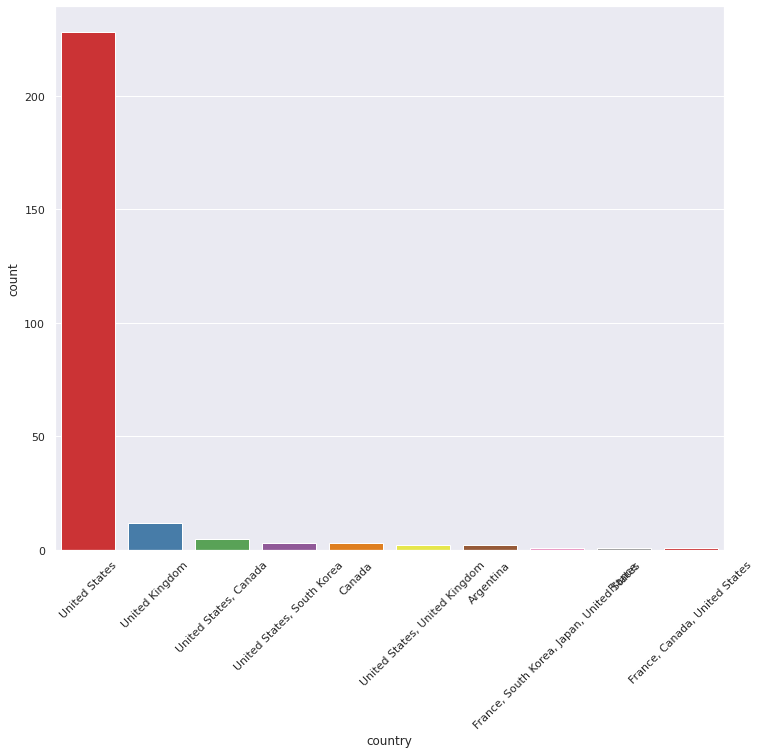

In [45]:
show_column(dsny_tv, dsny_tv['country'], 'country', 10, 45)

## Relation between Age and Genre

위에선 한 컨텐츠에 여러 장르가 쓰여있을 경우 모두 고려했지만 여기서는 가장 먼저 쓰인 장르만을 고려했다.

### Movie

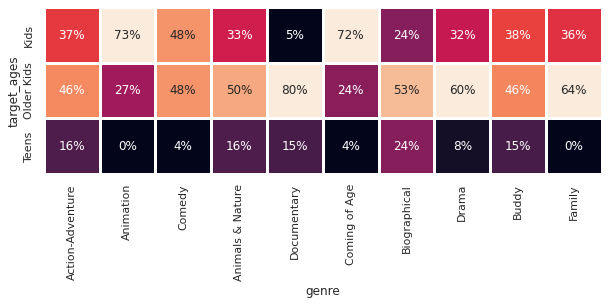

In [46]:
age_genre_heatmap(dsny_movie, ['Kids', 'Older Kids', 'Teens'])

### TV Show

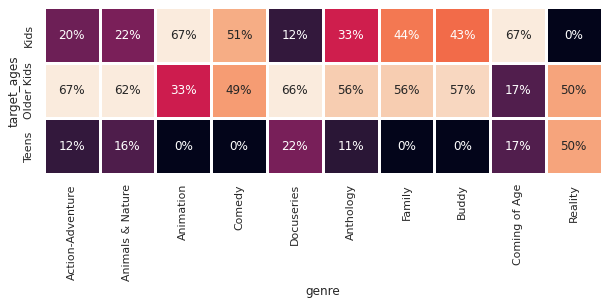

In [47]:
age_genre_heatmap(dsny_tv, ['Kids', 'Older Kids', 'Teens'])

# Amazon Prime Video EDA

## Loading the dataset

In [48]:
amz_basic = pd.read_csv('./amazon_prime_titles.csv')
amz_basic.head(10)

show_id   type                  title                     director  \
0      s1  Movie    The Grand Seduction                 Don McKellar   
1      s2  Movie   Take Care Good Night                 Girish Joshi   
2      s3  Movie   Secrets of Deception                  Josh Webber   
3      s4  Movie     Pink: Staying True               Sonia Anderson   
4      s5  Movie          Monster Maker                 Giles Foster   
5      s6  Movie  Living With Dinosaurs                 Paul Weiland   
6      s7  Movie              Hired Gun                  Fran Strine   
7      s8  Movie           Grease Live!  Thomas Kail, Alex Rudzinski   
8      s9  Movie        Global Meltdown                Daniel Gilboy   
9     s10  Movie         David's Mother        Robert Allan Ackerman   

                                                cast         country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   United States   
3  Interviews with: Pink, Adele, Beyoncé, Britney...   United States   
4  Harry Dean Stanton, Kieran O'Brien, George Cos...  United Kingdom   
5  Gregory Chisholm, Juliet Stevenson, Brian Hens...  United Kingdom   
6  Alice Cooper, Liberty DeVitto, Ray Parker Jr.,...   United States   
7  Julianne Hough, Aaron Tveit, Vanessa Hudgens, ...   United States   
8  Michael Paré, Leanne Khol Young, Patrick J. Ma...          Canada   
9    Kirstie Alley, Sam Waterston, Stockard Channing   United States   

       date_added  release_year rating duration  \
0  March 30, 2021          2014    NaN  113 min   
1  March 30, 2021          2018    13+  110 min   
2  March 30, 2021          2017    NaN   74 min   
3  March 30, 2021          2014    NaN   69 min   
4  March 30, 2021          1989    NaN   45 min   
5  March 30, 2021          1989    NaN   52 min   
6  March 30, 2021          2017    NaN   98 min   
7  March 30, 2021          2016    NaN  131 min   
8  March 30, 2021          2017    NaN   87 min   
9   April 1, 2021          1994    NaN   92 min   

                           listed_in  \
0                      Comedy, Drama   
1               Drama, International   
2            Action, Drama, Suspense   
3                        Documentary   
4                     Drama, Fantasy   
5                      Fantasy, Kids   
6      Documentary, Special Interest   
7                             Comedy   
8  Action, Science Fiction, Suspense   
9                              Drama   

                                         description  
0  A small fishing village must procure a local d...  
1  A Metro Family decides to fight a Cyber Crimin...  
2  After a man discovers his wife is cheating on ...  
3  Pink breaks the mold once again, bringing her ...  
4  Teenage Matt Banting wants to work with a famo...  
5  The story unfolds in a an English seaside town...  
6  They are the "First Call, A-list" musicians, j...  
7  This honest, uncompromising comedy chronicles ...  
8  A helicopter pilot and an environmental scient...  
9  Sally Goodson is a devoted mother to her autis...

In [49]:
# ratings 변경
add_target_ages(amz_basic)

0          NaN
1          13+
2          NaN
3          NaN
4          NaN
         ...  
9663        7+
9664       13+
9665    Adults
9666    Adults
9667    Adults
Name: target_ages, Length: 9668, dtype: object

In [50]:
amz_basic.count()

show_id         9668
type            9668
title           9668
director        7586
cast            8435
country          672
date_added       155
release_year    9668
rating          9331
duration        9668
listed_in       9668
description     9668
target_ages     9331
dtype: int64

In [51]:
amz_basic.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
target_ages      337
dtype: int64

## Analysis based on Type

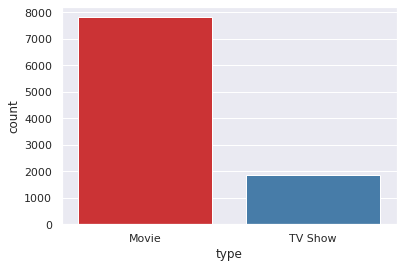

In [52]:
sns.set_style('darkgrid')
ax = sns.countplot(x="type", data=amz_basic, palette="Set1")

In [53]:
amz_tv = amz_basic[amz_basic['type']=='TV Show']

In [54]:
amz_movie = amz_basic[amz_basic['type']=='Movie']

## Analysis based on Genre

### Movie

In [55]:
amz_mg, amz_mg_dict, amz_mg_top10 = get_info(amz_movie['listed_in'])

가장 많은 수의 장르:Drama
가장 적은 수의 장르: Unscripted


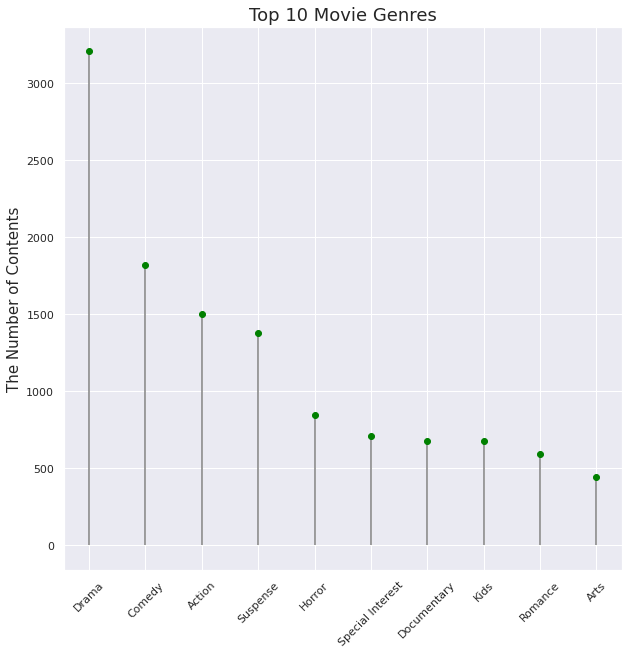

In [56]:
show_genre(amz_mg_top10, "Top 10 Movie Genres")
print(f"가장 많은 수의 장르:{list(amz_mg_dict.keys())[0]}\n가장 적은 수의 장르: {list(amz_mg_dict.keys())[-1]}")

### TV Show

In [57]:
amz_tg, amz_tg_dict, amz_tg_top10 = get_info(amz_tv['listed_in'])

가장 많은 수의 장르:Drama
가장 적은 수의 장르: Arthouse


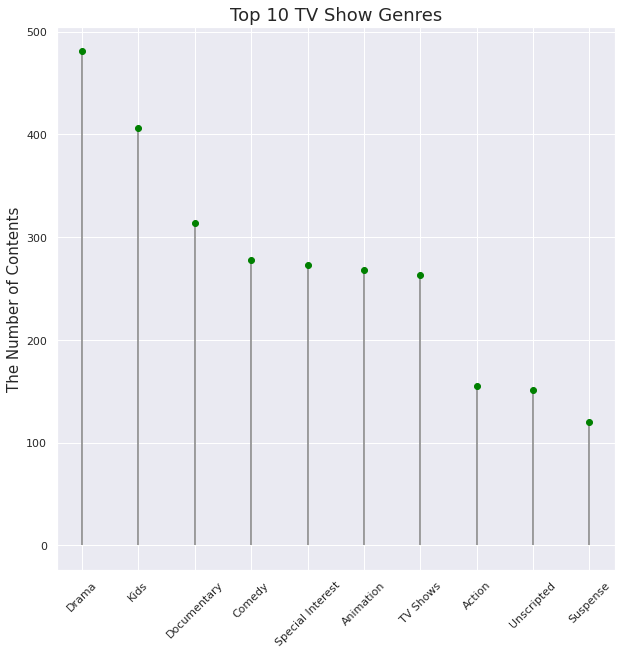

In [58]:
show_genre(amz_tg_top10, "Top 10 TV Show Genres")
print(f"가장 많은 수의 장르:{list(amz_tg_dict.keys())[0]}\n가장 적은 수의 장르: {list(amz_tg_dict.keys())[-1]}")

## Analysis based on Rating

### Movie

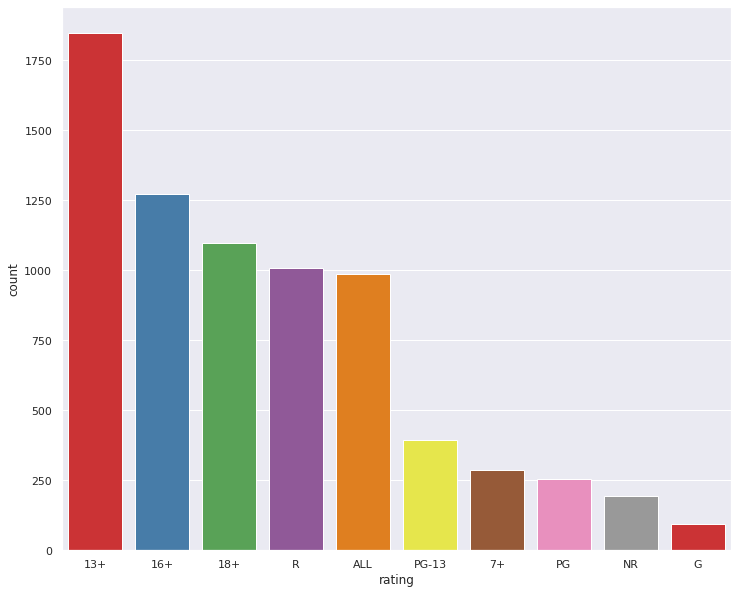

In [59]:
show_column(amz_movie, amz_movie['rating'], 'rating')

### TV show

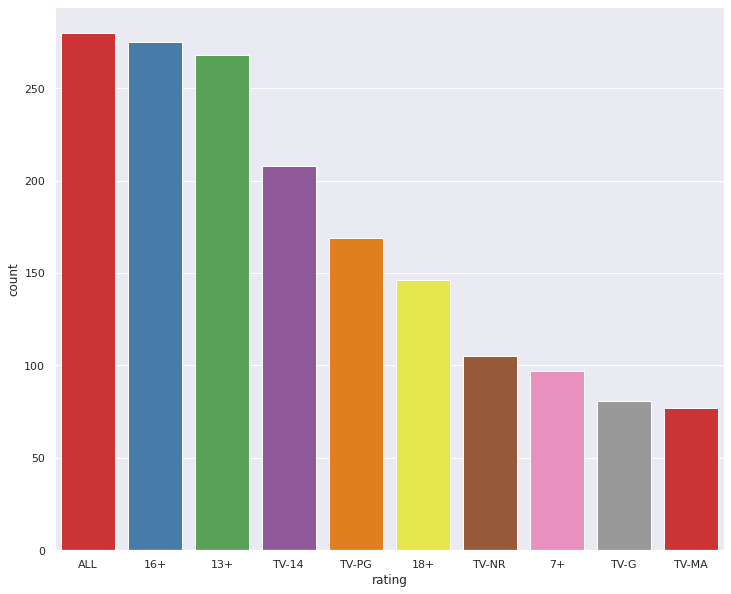

In [60]:
show_column(amz_tv, amz_tv['rating'], 'rating')

## Analysis based on Duration

가장 짧은 경우: 0
가장 긴 경우: 601


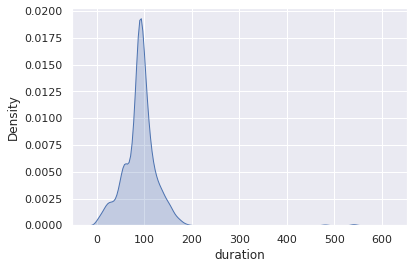

In [61]:
show_duration(amz_movie['duration'])

가장 짧은 경우: 1
가장 긴 경우: 29


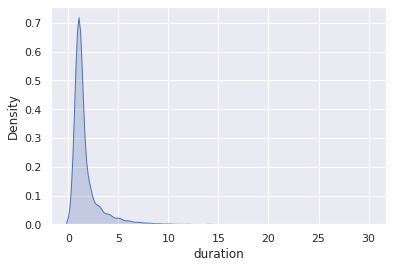

In [62]:
show_duration(amz_tv['duration'])

## Analysis based on Year

### Movie

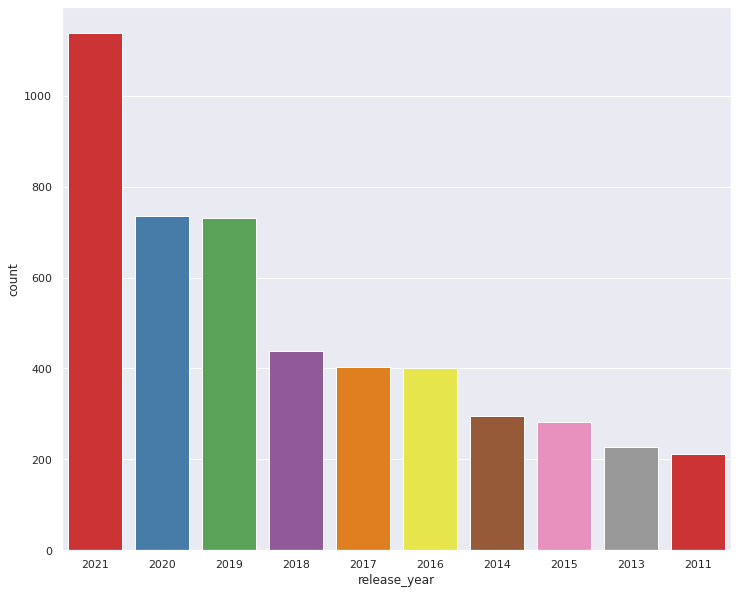

In [63]:
show_column(amz_movie, amz_movie['release_year'], 'release_year')

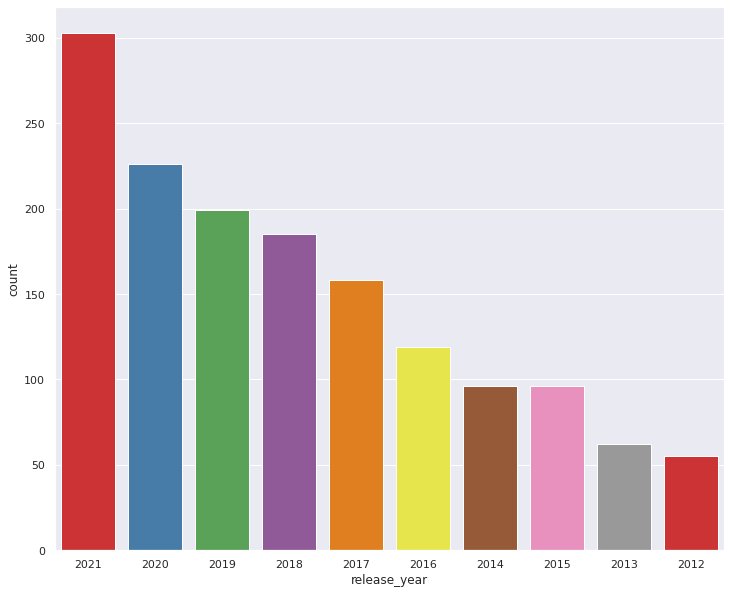

In [64]:
show_column(amz_tv, amz_tv['release_year'], 'release_year')

## Analysis based on Country

### Movie

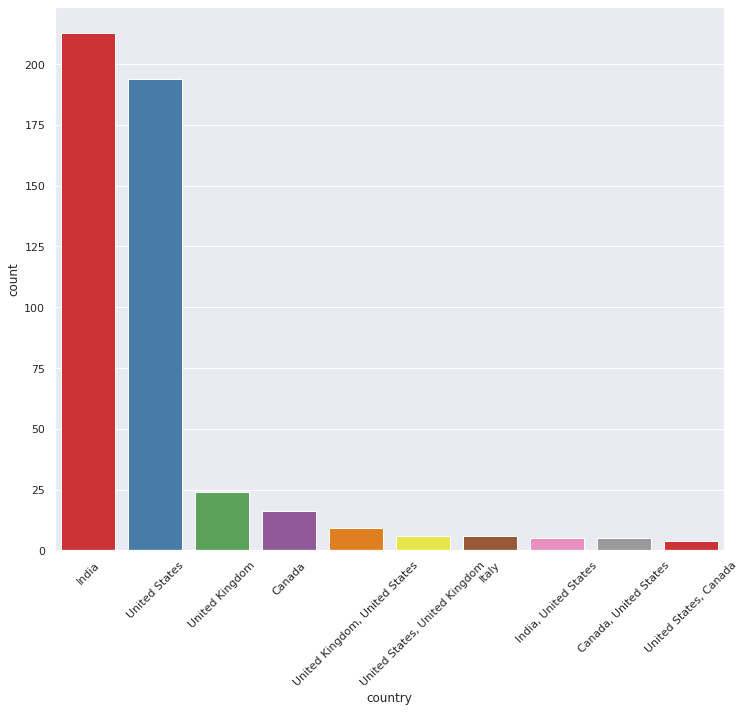

In [65]:
show_column(amz_movie, amz_movie['country'], 'country', 10, 45)

### TV show

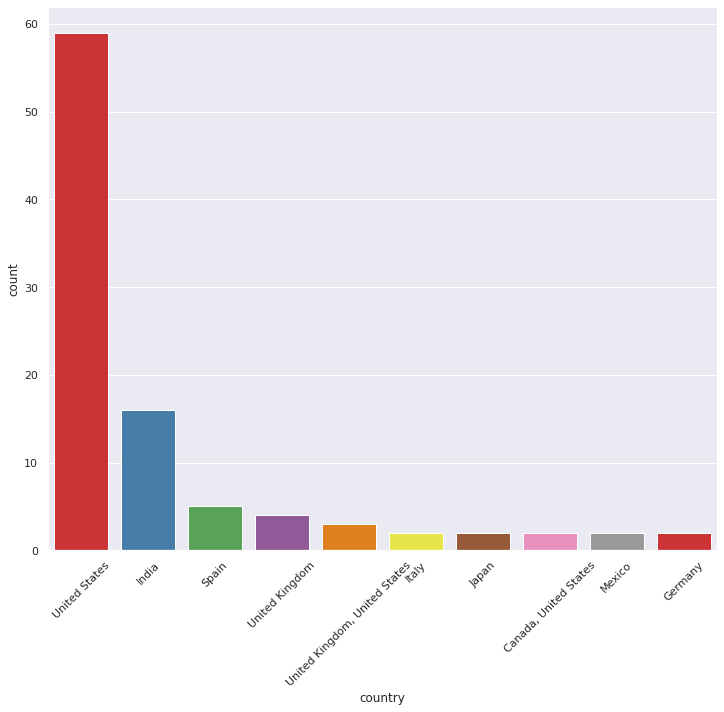

In [66]:
show_column(amz_tv, amz_tv['country'], 'country', 10, 45)

## Relation between Age and Genre

위에선 한 컨텐츠에 여러 장르가 쓰여있을 경우 모두 고려했지만 여기서는 가장 먼저 쓰인 장르만을 고려했다.

### Movie

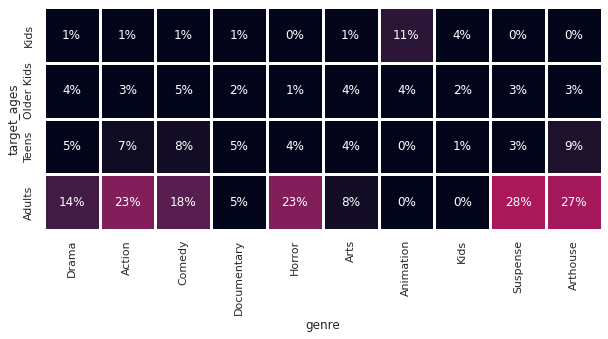

In [67]:
age_genre_heatmap(amz_movie)

### TV Show

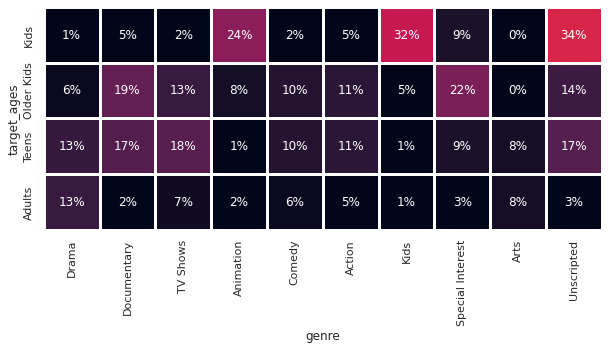

In [68]:
age_genre_heatmap(amz_tv)

# Hulu EDA

## Loading the dataset

In [69]:
hulu_basic = pd.read_csv('./hulu_titles.csv')
hulu_basic.head(10)

show_id     type                           title director  cast  \
0      s1    Movie  Ricky Velez: Here's Everything      NaN   NaN   
1      s2    Movie                    Silent Night      NaN   NaN   
2      s3    Movie                    The Marksman      NaN   NaN   
3      s4    Movie                            Gaia      NaN   NaN   
4      s5    Movie                        Settlers      NaN   NaN   
5      s6  TV Show   The Halloween Candy Magic Pet      NaN   NaN   
6      s7    Movie              The Evil Next Door      NaN   NaN   
7      s8  TV Show          The Next Thing You Eat      NaN   NaN   
8      s9  TV Show                          Queens      NaN   NaN   
9     s10  TV Show                The Bachelorette      NaN   NaN   

         country        date_added  release_year rating   duration  \
0            NaN  October 24, 2021          2021  TV-MA        NaN   
1            NaN  October 23, 2021          2020    NaN     94 min   
2            NaN  October 23, 2021          2021  PG-13    108 min   
3            NaN  October 22, 2021          2021      R     97 min   
4            NaN  October 22, 2021          2021    NaN    104 min   
5            NaN  October 22, 2021          2021    NaN   1 Season   
6            NaN  October 21, 2021          2020    NaN     88 min   
7            NaN  October 21, 2021          2021    NaN   1 Season   
8            NaN  October 20, 2021          2021  TV-14   1 Season   
9  United States  October 20, 2021          2003  TV-14  3 Seasons   

                                           listed_in  \
0                                   Comedy, Stand Up   
1                             Crime, Drama, Thriller   
2                                   Action, Thriller   
3                                             Horror   
4                          Science Fiction, Thriller   
5                                       Family, Kids   
6                                   Horror, Thriller   
7  Cooking & Food, Documentaries, Lifestyle & Cul...   
8                                       Drama, Music   
9                                   Reality, Romance   

                                         description  
0  ​Comedian Ricky Velez bares it all with his ho...  
1  Mark, a low end South London hitman recently r...  
2  A hardened Arizona rancher tries to protect an...  
3  A forest ranger and two survivalists with a cu...  
4  Mankind's earliest settlers on the Martian fro...  
5  Join Mila and Morphle on a mystery-filled Hall...  
6  New to her role as a stepmom, a young woman mo...  
7  With the unique insights and experience of Ugl...  
8  Four women in their 40s reunite for a chance t...  
9  ABC's romance reality show lets one lucky lady...

In [70]:
# ratings 변경
add_target_ages(hulu_basic)

0           Adults
1              NaN
2            Teens
3           Adults
4              NaN
           ...    
3068    Older Kids
3069    Older Kids
3070         Teens
3071    Older Kids
3072         Teens
Name: target_ages, Length: 3073, dtype: object

In [71]:
hulu_basic.count()

show_id         3073
type            3073
title           3073
director           3
cast               0
country         1620
date_added      3045
release_year    3073
rating          2553
duration        2594
listed_in       3073
description     3069
target_ages     2553
dtype: int64

In [72]:
hulu_basic.isnull().sum()

show_id            0
type               0
title              0
director        3070
cast            3073
country         1453
date_added        28
release_year       0
rating           520
duration         479
listed_in          0
description        4
target_ages      520
dtype: int64

## Analysis based on Type

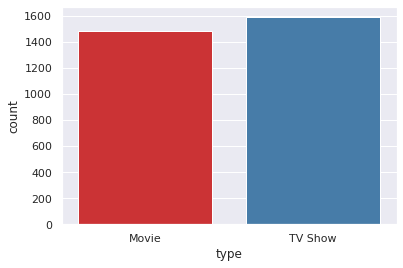

In [73]:
sns.set_style('darkgrid')
ax = sns.countplot(x="type", data=hulu_basic, palette="Set1")

In [74]:
hulu_tv = hulu_basic[hulu_basic['type']=='TV Show']

In [75]:
hulu_movie = hulu_basic[hulu_basic['type']=='Movie']

## Analysis based on Genre

### Movie

In [76]:
hulu_mg, hulu_mg_dict, hulu_mg_top10 = get_info(hulu_movie['listed_in'])

가장 많은 수의 장르:Drama
가장 적은 수의 장르: Health & Wellness


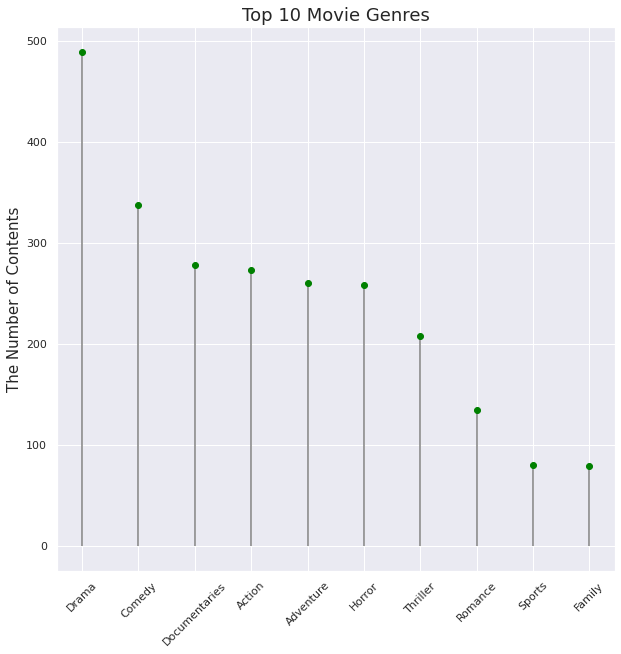

In [77]:
show_genre(hulu_mg_top10, "Top 10 Movie Genres")
print(f"가장 많은 수의 장르:{list(hulu_mg_dict.keys())[0]}\n가장 적은 수의 장르: {list(hulu_mg_dict.keys())[-1]}")

### TV Show

In [78]:
hulu_tg, hulu_tg_dict, hulu_tg_top10 = get_info(hulu_tv['listed_in'])

가장 많은 수의 장르:Drama
가장 적은 수의 장르: Arthouse


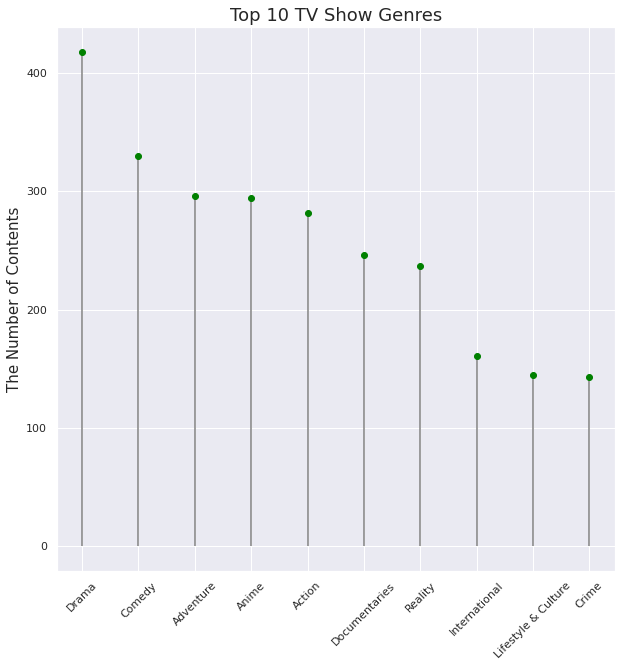

In [79]:
show_genre(hulu_tg_top10, "Top 10 TV Show Genres")
print(f"가장 많은 수의 장르:{list(hulu_tg_dict.keys())[0]}\n가장 적은 수의 장르: {list(amz_tg_dict.keys())[-1]}")

## Analysis based on Rating

### Movie

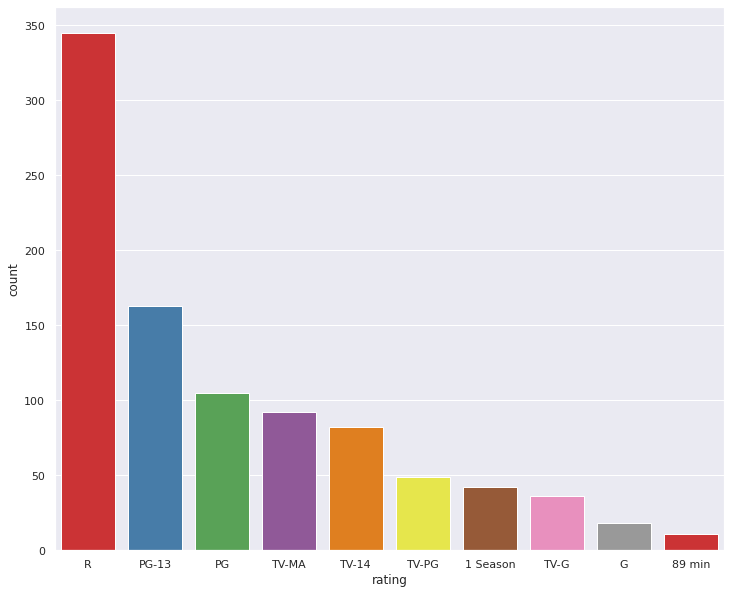

In [80]:
show_column(hulu_movie, hulu_movie['rating'], 'rating')

### TV show

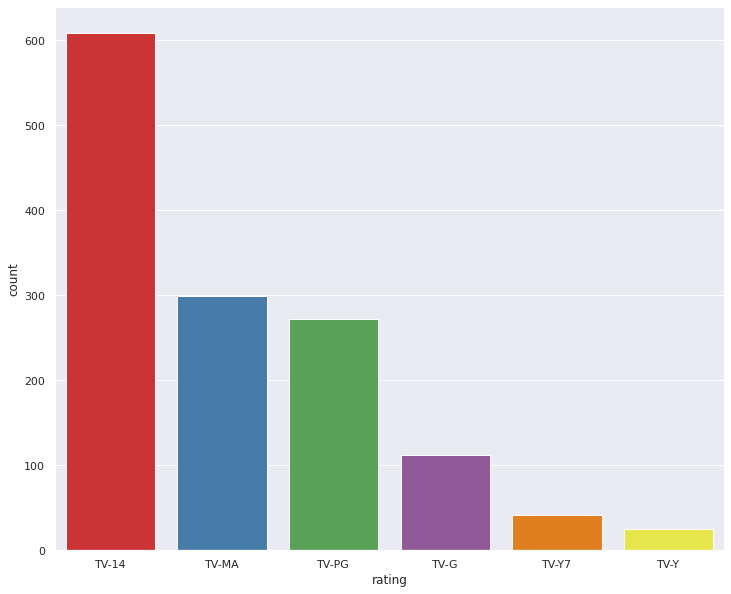

In [81]:
show_column(hulu_tv, hulu_tv['rating'], 'rating')

## Analysis based on Duration

가장 짧은 경우: 1
가장 긴 경우: 192


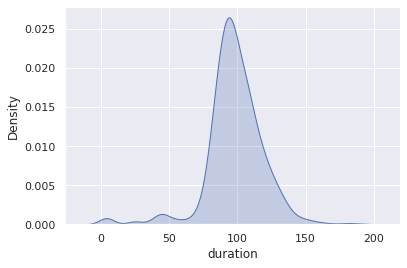

In [82]:
show_duration(hulu_movie['duration'])

가장 짧은 경우: 1
가장 긴 경우: 34


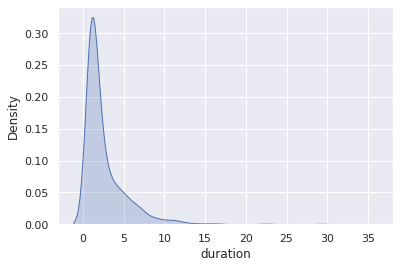

In [83]:
show_duration(hulu_tv['duration'])

## Analysis based on Year

### Movie

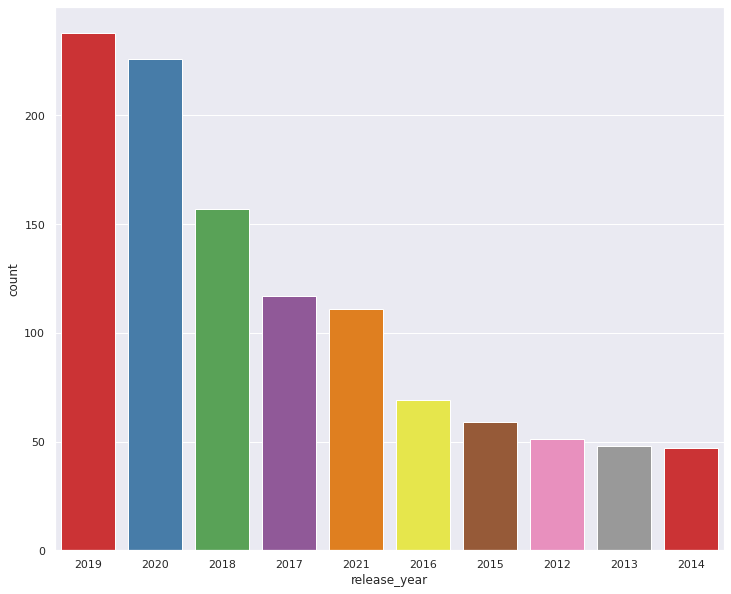

In [84]:
show_column(hulu_movie, hulu_movie['release_year'], 'release_year')

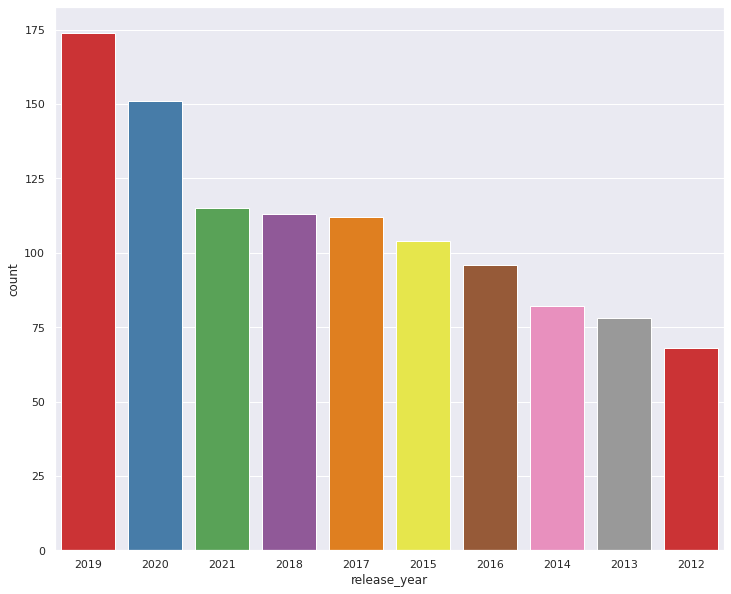

In [85]:
show_column(hulu_tv, hulu_tv['release_year'], 'release_year')

## Analysis based on Country

### Movie

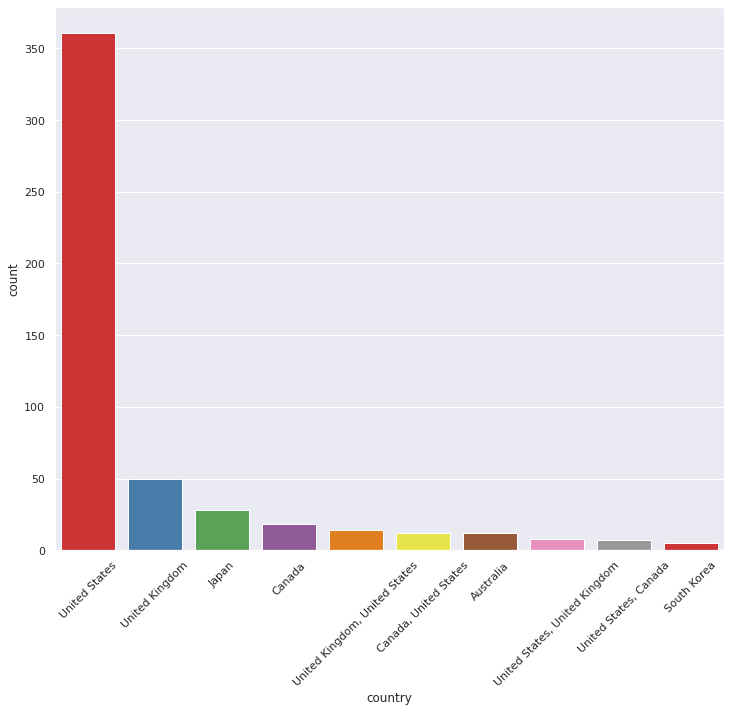

In [86]:
show_column(hulu_movie, hulu_movie['country'], 'country', 10, 45)

### TV show

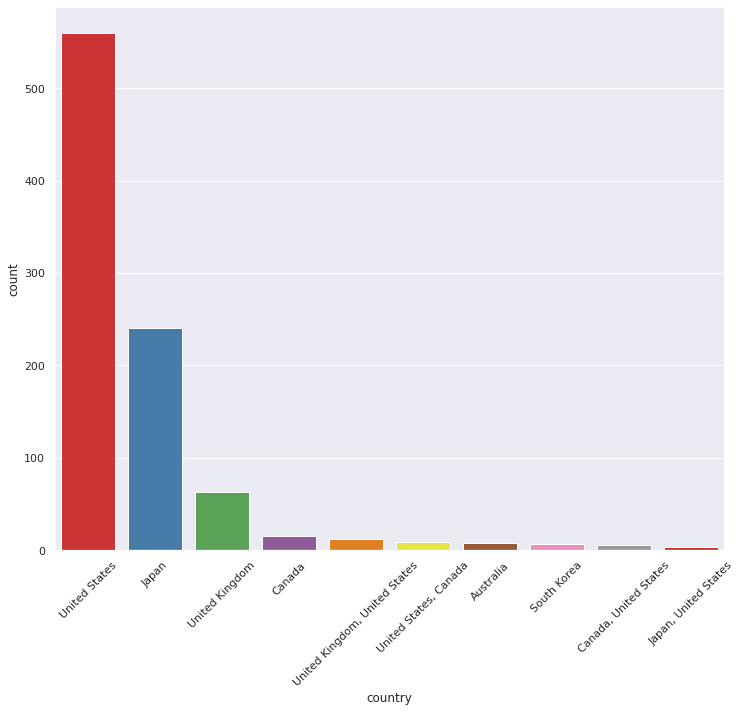

In [87]:
show_column(hulu_tv, hulu_tv['country'], 'country', 10, 45)

## Relation between Age and Genre

위에선 한 컨텐츠에 여러 장르가 쓰여있을 경우 모두 고려했지만 여기서는 가장 먼저 쓰인 장르만을 고려했다.

### Movie

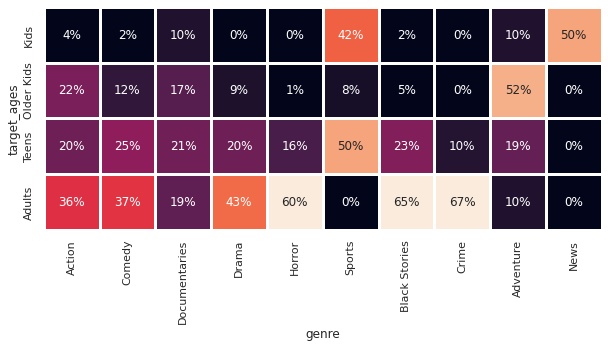

In [88]:
age_genre_heatmap(hulu_movie)

### TV Show

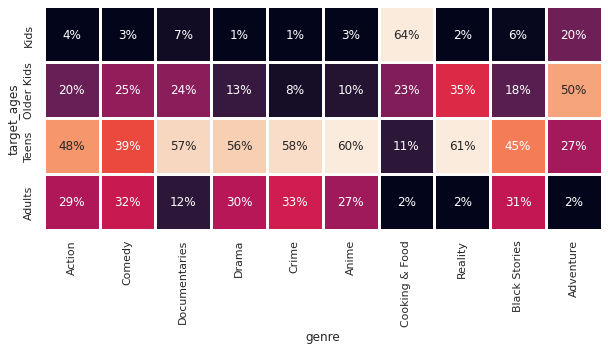

In [89]:
age_genre_heatmap(hulu_tv)